*Taller # 1 Métodos Computacionales*

Primer punto

In [4]:
import numpy as np

def NUDFT(ts, ys, f):
    h = 0
    N = len(ys)
    for k in range(N):
        h += ys[k] * np.exp(-2j * np.pi * f * ts[k])

    return h

ts = np.linspace(0,20,200)
ys = np.sin(ts)

In [5]:
NUDFT(ts,ys,0.1)

(10.182890588732722-9.435365325708728j)

Segundo punto

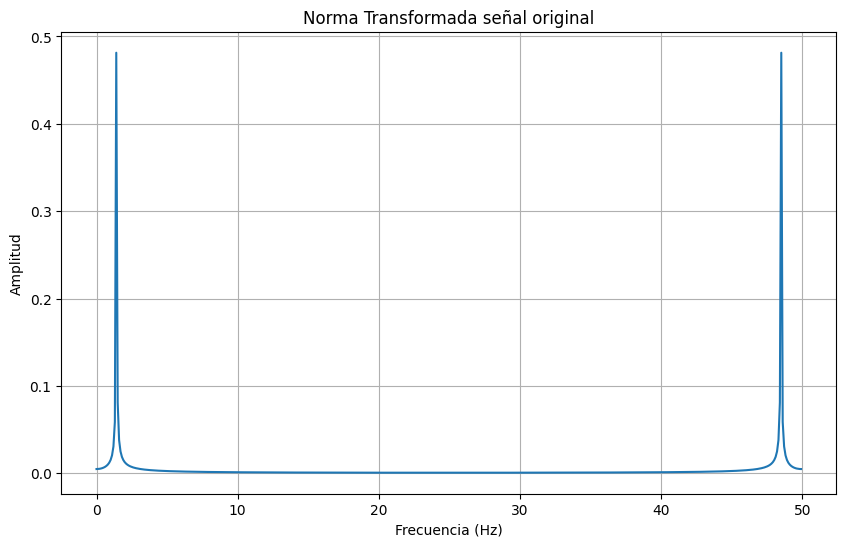

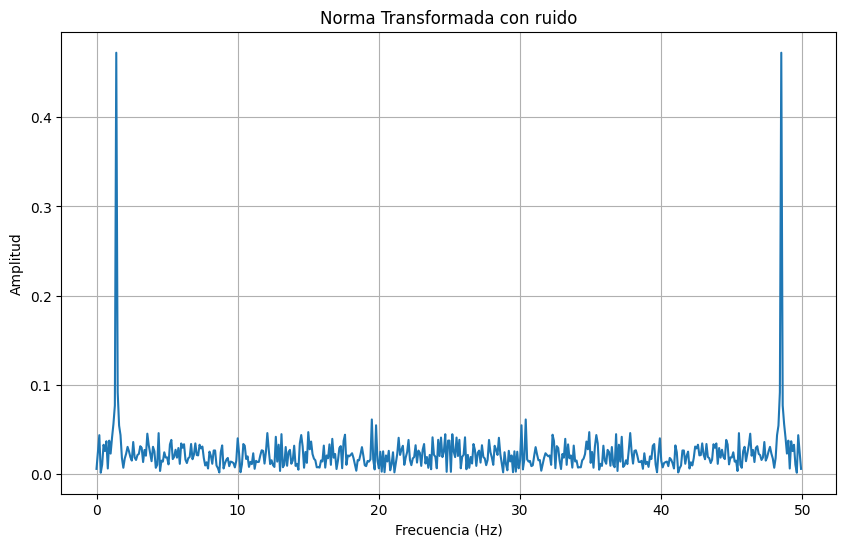

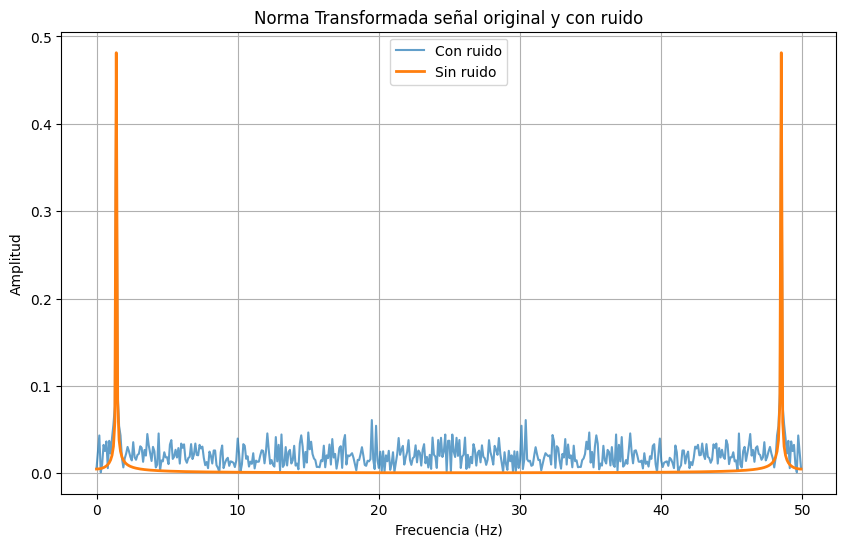

In [25]:
import numpy as np
import matplotlib.pyplot as plt

t_max = 10
N = 500
t = np.linspace(0, t_max, N)



y = np.sin(2 * np.pi * np.sqrt(2) * t)

frecuencias = np.arange(0, N) / (N * (t_max / N))

Y = np.array([NUDFT(t, y, f) for f in frecuencias])



plt.figure(figsize=(10, 6))
plt.plot(frecuencias, np.abs(Y) / N)
plt.title("Norma Transformada señal original")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

ruido = np.random.normal(0, 0.5, y.shape)
y_ruido = y + ruido

Y_ruido = np.array([NUDFT(t, y_ruido, f) for f in frecuencias])


plt.figure(figsize=(10, 6))
plt.plot(frecuencias, np.abs(Y_ruido) / N)
plt.title("Norma Transformada con ruido")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(frecuencias, np.abs(Y_ruido) / N, label='Con ruido', alpha=0.7)
plt.plot(frecuencias, np.abs(Y) / N, label='Sin ruido', linewidth=2)
plt.title("Norma Transformada señal original y con ruido")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


¿Qué sucede si le agrega ruido a la señal en 𝑦?

Al agregar ruido a la señal y se espera que el espectro de la señal sea mucho más disperso en comparación a cuando la señal no tiene ruido. Esto nos muestra como la energía de la señal se distribuye a lo largo de las distintas frencuencias.

Tercer punto

Cambie sólo el número de muestras 𝑁.¿Cambia la posición del pico o su ancho? ¿Por qué?

Al cambiar el número de muestras no debería cambiar la posición del pico. Debido a que la frecuencia de la señal no depende del número de muestras.Lo mismo sucede con el FWHM, sin embargo, si es de esperarse que cambie la frecuencia de Nyquist.

Cambie sólo el rango de tiempo 𝑡max
¿Cambia la posición del pico o su ancho? ¿Por qué?

Cambiar el t_max afectará la resolución de las frecuencias para la transformada de Fourier. Si se aumenta el t_max y N se mantiene constante, el intervalo de frecuencias en el dominio de la frecuencia disminuirá, pero la posición del pico no debe cambiar. Por otra parte, si el t_max se encuentra en un valor alto el FWMH se puede reducir y esto haría el pico más definido.

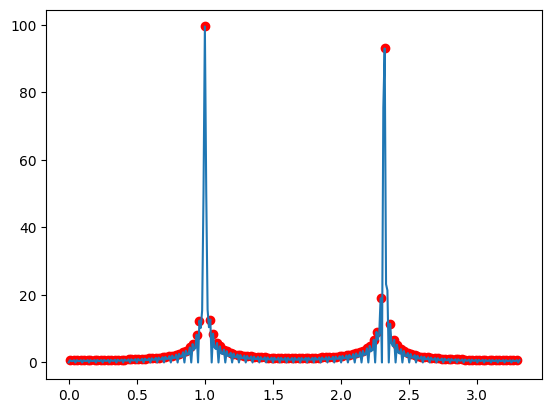

0.05001020719596059


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

t_max = 60

tiempo = np.linspace(0,t_max,200)

señal = np.sin(2 * np.pi * (2 * (1/2)) * tiempo)

frecuencia_muestreo = 1 / (tiempo[1] - tiempo[0])

frecuencias = np.arange(0, frecuencia_muestreo, 0.01)

magnitudes_transformada = []

for frecuencia in frecuencias:
    coeficiente_fourier = NUDFT(tiempo, señal, frecuencia)
    magnitud = np.abs(coeficiente_fourier)
    magnitudes_transformada.append(magnitud)

indices_picos, _ = find_peaks(magnitudes_transformada)


magnitudes_array = np.array(magnitudes_transformada)

plt.scatter(frecuencias[indices_picos], magnitudes_array[indices_picos], color='red')
plt.plot(frecuencias, magnitudes_array)
plt.show()

indice_primer_pico = indices_picos[0]
altura_pico = magnitudes_array[indice_primer_pico]
media_altura = altura_pico / 2

indice_izquierdo = np.where(magnitudes_array[:indice_primer_pico] <= media_altura)[0][-1]
indice_derecho = np.where(magnitudes_array[indice_primer_pico:] <= media_altura)[0][0] + indice_primer_pico

frecuencia_izquierda = frecuencias[indice_izquierdo] + (media_altura - magnitudes_array[indice_izquierdo]) / (magnitudes_array[indice_izquierdo + 1] - magnitudes_array[indice_izquierdo]) * (frecuencias[indice_izquierdo + 1] - frecuencias[indice_izquierdo])
frecuencia_derecha = frecuencias[indice_derecho] + (media_altura - magnitudes_array[indice_derecho - 1]) / (magnitudes_array[indice_derecho] - magnitudes_array[indice_derecho - 1]) * (frecuencias[indice_derecho] - frecuencias[indice_derecho - 1])

ancho_media_altura = frecuencia_derecha - frecuencia_izquierda
print(ancho_media_altura)


Cuando cambia N no hay cambio visible en las grafica, no obstante, cuando se cambia el t el ancho se ve afectado.

**Cuarto punto**

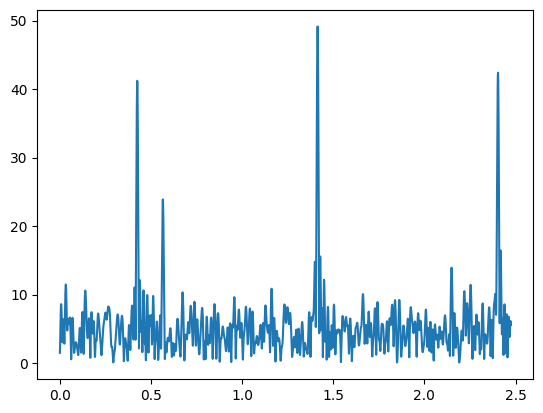

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ts = np.linspace(0,100,100)
ruido = ts + np.random.normal(0.1,0.1,len(ts))
y = np.sin(2 * np.pi * np.sqrt(2) * ruido)
tm = 1/(ts[1]-ts[0])
f_nyquist = tm / 2

f_nyquist_n = f_nyquist * 5

f = np.arange(0,f_nyquist_n,0.001)

fourier = []

for i in f:

  t_fourier =  NUDFT(ruido,y,i)
  norma = np.abs(t_fourier)
  fourier.append(norma)

plt.plot(f,fourier)

mos la frecuencias de Nyquist al ponerle ruido al intervalo de tiempo, no obstante, afortunadamente pudimos el valor d ela frecuencia de la función original.

**Quinto punto**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


file_path = 'https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat '


data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['t', 'y', 'sigma_y'])


print(data.head())
print(data)